In [1]:
import cv2, glob, time
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as D

import torchvision
from torchvision import transforms as T

import albumentations as A
from tqdm import tqdm
import matplotlib.pyplot as plt

ERROR:albumentations.check_version:Error fetching version info
Traceback (most recent call last):
  File "/home/macy/miniconda3/envs/mage/lib/python3.9/site-packages/albumentations/check_version.py", line 32, in fetch_version_info
    data = response.read()
  File "/home/macy/miniconda3/envs/mage/lib/python3.9/http/client.py", line 476, in read
    s = self._safe_read(self.length)
  File "/home/macy/miniconda3/envs/mage/lib/python3.9/http/client.py", line 626, in _safe_read
    chunk = self.fp.read(min(amt, MAXAMOUNT))
  File "/home/macy/miniconda3/envs/mage/lib/python3.9/socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "/home/macy/miniconda3/envs/mage/lib/python3.9/ssl.py", line 1275, in recv_into
    return self.read(nbytes, buffer)
  File "/home/macy/miniconda3/envs/mage/lib/python3.9/ssl.py", line 1133, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read operation timed out


In [2]:
train_img = glob.glob('./train/*_input.jpg')
train_mask = glob.glob('./train/*_target.jpg')
train_img.sort(); train_mask.sort()

In [3]:
len(train_img)

5000

In [4]:
cv2.imread(train_mask[0]).shape

(512, 512, 3)

In [5]:
cv2.imread(train_img[0]).shape

(512, 512, 3)

In [6]:
class FoodDataset(D.Dataset):
    def __init__(self, images, masks, transform):
        self.images = images
        self.masks = masks
        
        self.transform = transform
        self.as_tensor = T.Compose([
            T.ToTensor(),
            T.Normalize([0.625, 0.448, 0.688],
                        [0.131, 0.177, 0.101]),
        ])
        

    # get data operation
    def __getitem__(self, index):
        image, mask = cv2.imread(self.images[index]), cv2.imread(self.masks[index])
        mask = np.transpose(mask, (2, 0, 1))
        # transpose((2, 0, 1))
        
        # augments = self.transform(image=image, mask=mask)
        return self.as_tensor(image), mask / 255.0
        # return augments['image'], augments['mask'][None]

    def __len__(self):
        return len(self.images)


trfm = A.Compose([
    A.Resize(512,512),
    # A.HorizontalFlip(p=0.5, is_check_shapes=False),
    # A.VerticalFlip(p=0.5, is_check_shapes=False),
    
    # A.OneOf([
    #     A.RandomGamma(),
    #     A.ColorJitter(brightness=0.07, contrast=0.07,
    #                saturation=0.1, hue=0.1, always_apply=False, p=0.3),
    #     ], p=0.3),
    # A.OneOf([
    #     A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    #     A.GridDistortion(),
    #     A.OpticalDistortion(distort_limit=2, shift_limit=0.5),
    #     ], p=0.0),
    # A.ShiftScaleRotate(),
])

train_ds = FoodDataset(train_img[:-200], train_mask[:-200], transform=trfm)


trfm = A.Compose([
    A.Resize(512,512),
])
val_ds = FoodDataset(train_img[-200:], train_mask[-200:], transform=trfm)

In [7]:
train_ds[0][1].shape

(3, 512, 512)

In [8]:
train_loader = D.DataLoader( train_ds, batch_size=4, shuffle=True, num_workers=3)
val_loader = D.DataLoader( val_ds, batch_size=4, shuffle=False, num_workers=3)

## Unet

In [9]:
import segmentation_models_pytorch as smp

model = smp.Unet(
    encoder_name="efficientnet-b7",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=3
)

# model = smp.DeepLabV3(
#     encoder_name="resnet18",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
#     encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
#     in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
#     classes=103,                      # model output channels (number of classes in your dataset)
# )

100%|██████████| 1200/1200 [07:30<00:00,  2.66it/s]


Epoch 1/30
Train Loss: 0.0417, Validation Loss: 0.0282
Time: 7.60 minutes



100%|██████████| 1200/1200 [07:15<00:00,  2.75it/s]


Epoch 2/30
Train Loss: 0.0285, Validation Loss: 0.0249
Time: 7.35 minutes



100%|██████████| 1200/1200 [07:17<00:00,  2.74it/s]


Epoch 3/30
Train Loss: 0.0253, Validation Loss: 0.0242
Time: 7.39 minutes



100%|██████████| 1200/1200 [07:21<00:00,  2.72it/s]


Epoch 4/30
Train Loss: 0.0233, Validation Loss: 0.0265
Time: 7.45 minutes



100%|██████████| 1200/1200 [07:17<00:00,  2.74it/s]


Epoch 5/30
Train Loss: 0.0219, Validation Loss: 0.0222
Time: 7.38 minutes



100%|██████████| 1200/1200 [07:23<00:00,  2.71it/s]


Epoch 6/30
Train Loss: 0.0202, Validation Loss: 0.0220
Time: 7.48 minutes



100%|██████████| 1200/1200 [07:16<00:00,  2.75it/s]


Epoch 7/30
Train Loss: 0.0191, Validation Loss: 0.0219
Time: 7.37 minutes



100%|██████████| 1200/1200 [07:24<00:00,  2.70it/s]


Epoch 8/30
Train Loss: 0.0179, Validation Loss: 0.0208
Time: 7.50 minutes



100%|██████████| 1200/1200 [07:28<00:00,  2.68it/s]


Epoch 9/30
Train Loss: 0.0166, Validation Loss: 0.0212
Time: 7.56 minutes



100%|██████████| 1200/1200 [07:20<00:00,  2.72it/s]


Epoch 10/30
Train Loss: 0.0157, Validation Loss: 0.0209
Time: 7.43 minutes



100%|██████████| 1200/1200 [07:22<00:00,  2.71it/s]


Epoch 11/30
Train Loss: 0.0150, Validation Loss: 0.0201
Time: 7.46 minutes



100%|██████████| 1200/1200 [07:16<00:00,  2.75it/s]


Epoch 12/30
Train Loss: 0.0142, Validation Loss: 0.0213
Time: 7.36 minutes



100%|██████████| 1200/1200 [07:15<00:00,  2.75it/s]


Epoch 13/30
Train Loss: 0.0134, Validation Loss: 0.0204
Time: 7.35 minutes



100%|██████████| 1200/1200 [07:23<00:00,  2.71it/s]


Epoch 14/30
Train Loss: 0.0127, Validation Loss: 0.0198
Time: 7.48 minutes



100%|██████████| 1200/1200 [07:23<00:00,  2.71it/s]


Epoch 15/30
Train Loss: 0.0120, Validation Loss: 0.0199
Time: 7.48 minutes



100%|██████████| 1200/1200 [07:29<00:00,  2.67it/s]


Epoch 16/30
Train Loss: 0.0114, Validation Loss: 0.0198
Time: 7.59 minutes



100%|██████████| 1200/1200 [07:20<00:00,  2.73it/s]


Epoch 17/30
Train Loss: 0.0108, Validation Loss: 0.0196
Time: 7.43 minutes



100%|██████████| 1200/1200 [07:18<00:00,  2.74it/s]


Epoch 18/30
Train Loss: 0.0102, Validation Loss: 0.0195
Time: 7.40 minutes



100%|██████████| 1200/1200 [07:27<00:00,  2.68it/s]


Epoch 19/30
Train Loss: 0.0097, Validation Loss: 0.0198
Time: 7.55 minutes



100%|██████████| 1200/1200 [07:21<00:00,  2.72it/s]


Epoch 20/30
Train Loss: 0.0093, Validation Loss: 0.0195
Time: 7.45 minutes



100%|██████████| 1200/1200 [07:20<00:00,  2.73it/s]


Epoch 21/30
Train Loss: 0.0088, Validation Loss: 0.0195
Time: 7.43 minutes



100%|██████████| 1200/1200 [07:14<00:00,  2.76it/s]


Epoch 22/30
Train Loss: 0.0085, Validation Loss: 0.0195
Time: 7.33 minutes



100%|██████████| 1200/1200 [07:23<00:00,  2.71it/s]


Epoch 23/30
Train Loss: 0.0082, Validation Loss: 0.0194
Time: 7.48 minutes



100%|██████████| 1200/1200 [07:33<00:00,  2.65it/s]


Epoch 24/30
Train Loss: 0.0079, Validation Loss: 0.0195
Time: 7.65 minutes



100%|██████████| 1200/1200 [07:24<00:00,  2.70it/s]


Epoch 25/30
Train Loss: 0.0077, Validation Loss: 0.0195
Time: 7.50 minutes



100%|██████████| 1200/1200 [07:25<00:00,  2.69it/s]


Epoch 26/30
Train Loss: 0.0075, Validation Loss: 0.0195
Time: 7.52 minutes



100%|██████████| 1200/1200 [07:25<00:00,  2.69it/s]


Epoch 27/30
Train Loss: 0.0074, Validation Loss: 0.0195
Time: 7.52 minutes



100%|██████████| 1200/1200 [07:17<00:00,  2.74it/s]


Epoch 28/30
Train Loss: 0.0073, Validation Loss: 0.0195
Time: 7.38 minutes



100%|██████████| 1200/1200 [07:20<00:00,  2.72it/s]


Epoch 29/30
Train Loss: 0.0072, Validation Loss: 0.0195
Time: 7.43 minutes



100%|██████████| 1200/1200 [07:12<00:00,  2.78it/s]


Epoch 30/30
Train Loss: 0.0072, Validation Loss: 0.0194
Time: 7.29 minutes



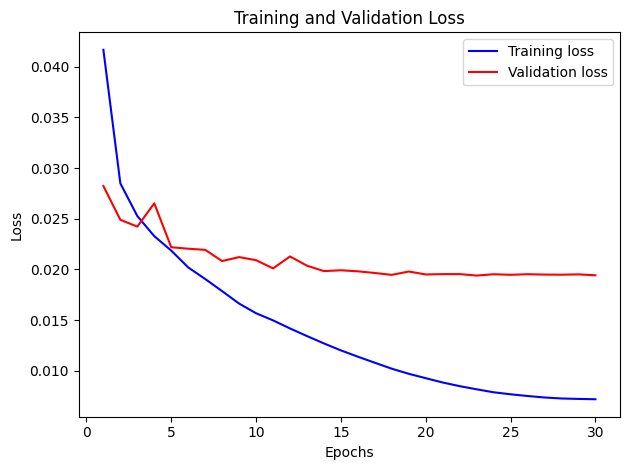

In [10]:
header = r'''
        Train | Valid
Epoch |  Loss |  Loss | Time, m
'''
raw_line = '{:6d}' + '\u2502{:7.3f}'*2 + '\u2502{:6.2f}'

@torch.no_grad()
def validation(model, loader, loss_fn):
    losses = []
    model.eval()
    for image, target in loader:
        image, target = image.to('cuda'), target.to('cuda').float()
        output = model(image)
        loss = loss_fn(output, target)
        losses.append(loss.item())
                
    avg_loss = np.array(losses).mean()
    return avg_loss


EPOCHES = 30
model.to('cuda')
optimizer = torch.optim.Adam(model.parameters(), lr=8e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHES)
bce_fn = nn.MSELoss()


train_losses = []
val_losses = []

for epoch in range(1, EPOCHES + 1):
    losses = []
    start_time = time.time()
    model.train()
    for image, target in tqdm(train_loader):
        image, target = image.to('cuda'), target.to('cuda').float()
        optimizer.zero_grad()
        output = model(image)
        loss = bce_fn(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        
    avg_train_loss = np.mean(losses)
    avg_loss = validation(model, val_loader, bce_fn)
    
    train_losses.append(avg_train_loss)
    val_losses.append(avg_loss)
    
    # Update learning rate
    scheduler.step()
    
    print(f"Epoch {epoch}/{EPOCHES}")
    print(f"Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_loss:.4f}")
    print(f"Time: {(time.time() - start_time) / 60:.2f} minutes\n")

epochs = range(1, EPOCHES + 1)
plt.figure()
plt.plot(epochs, train_losses, 'b', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
output.shape, target.shape

(torch.Size([4, 3, 512, 512]), torch.Size([4, 3, 512, 512]))

In [12]:
model.eval()
for image, target in val_loader:
    image, target = image.to('cuda'), target.to('cuda').float()
    output = model(image)
    break

In [13]:
output = (output.data.cpu().numpy() * 255).astype(np.uint8)
output = output[3]
output = np.transpose(output, (1,2, 0))

target = (target.data.cpu().numpy() * 255).astype(np.uint8)
target = target[3]
target = np.transpose(target, (1,2, 0))

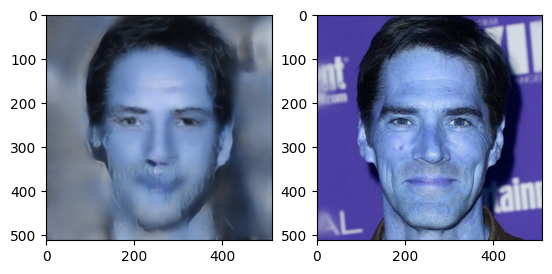

In [14]:
plt.subplot(121)
plt.imshow(output)

plt.subplot(122)
plt.imshow(target)

In [15]:
trfm = A.Compose([
    A.Resize(512,512),
])
test_img = glob.glob('./test/*_input.jpg')
test_img.sort()
test_ds = FoodDataset(test_img, test_img, transform=trfm)
test_loader = D.DataLoader( test_ds, batch_size=4, shuffle=False, num_workers=3)

In [16]:
!mkdir submit

mkdir: cannot create directory ‘submit’: File exists


In [17]:
model.eval()
idx = 0
with torch.no_grad():
    for image, target in test_loader:
        image, target = image.to('cuda'), target.to('cuda').float()
        outputs = model(image)
        outputs = (outputs.data.cpu().numpy() * 255).astype(np.uint8)
        for output in outputs:
            output = np.transpose(output, (1,2, 0))
            cv2.imwrite('submit/' + test_img[idx].split('/')[-1].replace('input', 'target'), output)
            idx += 1

In [18]:
!ls -l submit | wc -l
!ls -l test | wc -l

1501
1501


In [19]:
!zip -r submit.zip submit

updating: submit/ (stored 0%)
updating: submit/8a0dd6ac-33b8-4e93-8399-8e380e9db5dd_target.jpg (deflated 1%)
updating: submit/5110609d-0a82-478b-b88b-20994ffbe497_target.jpg (deflated 1%)
updating: submit/d48a53ad-5398-4b4b-bd48-b37125eb2eca_target.jpg (deflated 1%)
updating: submit/28d2edb3-d329-4953-b2d6-367cd35ed73b_target.jpg (deflated 0%)
updating: submit/0b1ddee9-b85c-451b-bfab-07f82265d286_target.jpg (deflated 0%)
updating: submit/99cf8890-b01a-41c7-85bd-3f858151e516_target.jpg (deflated 0%)
updating: submit/e3276417-ad4f-4ec0-ba3a-0caa20ef7ccb_target.jpg (deflated 0%)
updating: submit/8f4a9823-d987-4e2e-a14f-b4134026d882_target.jpg (deflated 0%)
updating: submit/980c5c25-fae1-4d64-8e43-d6874bd6e01d_target.jpg (deflated 0%)
updating: submit/08712ab1-adc5-46ce-a8ce-6468331309e4_target.jpg (deflated 0%)
updating: submit/0b156ff7-fc96-41f0-a65c-3cfadb3147b5_target.jpg (deflated 0%)
updating: submit/d649473e-3f23-4368-ba37-dc90937c3653_target.jpg (deflated 0%)
updating: submit/a1f1b